# Iniciar


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/archivos_tp/data.zip"
extract_path = "/content/drive/MyDrive/Colab Notebooks"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Carga CSV


In [ ]:
categories_ruta = "/content/drive/MyDrive/Colab Notebooks/archivos_tp/categories.csv"
categories = pd.read_csv(categories_ruta)

In [ ]:
inventory_logs_ruta = "/content/drive/MyDrive/Colab Notebooks/inventory_logs.csv"
inventory_logs = pd.read_csv(inventory_logs_ruta)

In [ ]:
order_items_ruta = "/content/drive/MyDrive/Colab Notebooks/order_items.csv"
order_items = pd.read_csv(order_items_ruta)

In [ ]:
orders_ruta = "/content/drive/MyDrive/Colab Notebooks/orders.csv"
orders = pd.read_csv(orders_ruta)

In [ ]:
products_ruta = "/content/drive/MyDrive/Colab Notebooks/products.csv"
products = pd.read_csv(products_ruta)

In [ ]:
reviews_ruta = "/content/drive/MyDrive/Colab Notebooks/reviews.csv"
reviews = pd.read_csv(reviews_ruta)

In [ ]:
customers_ruta = "/content/drive/MyDrive/Colab Notebooks/customers.csv"
customers = pd.read_csv(customers_ruta)

# Estandarizacion


In [ ]:
orders.status = orders.status.str.strip().str.lower()
orders.payment_method = orders.payment_method.str.strip().str.lower()
orders.shipping_address = orders.shipping_address.str.strip().str.lower()
orders.billing_address = orders.billing_address.str.strip().str.lower()
orders.currency = orders.currency.str.strip().str.upper()

In [ ]:
customers.first_name = customers.first_name.str.strip().str.upper()
customers.last_name = customers.last_name.str.strip().str.upper()
customers.country = customers.country.str.strip().str.upper()
customers.city = customers.city.str.strip().str.upper()
customers.address = customers.address.str.strip().str.lower()
customers.customer_segment = customers.customer_segment.str.strip().str.lower()

In [ ]:
products.product_name = products.product_name.str.strip().str.lower()
products.brand = products.brand.str.strip().str.upper()
products.description = products.description.str.strip().str.lower()

In [ ]:
inventory_logs.movement_type = inventory_logs.movement_type.str.strip().str.lower()
inventory_logs.reason = inventory_logs.reason.str.strip().str.lower()
inventory_logs.notes = inventory_logs.notes.str.strip().str.lower()

In [ ]:
reviews.title = reviews.title.str.strip().str.lower()
reviews.comment = reviews.comment.str.strip().str.lower()

In [ ]:
categories.category_name = categories.category_name.str.strip().str.lower()
categories.parent_category = categories.parent_category.str.strip().str.upper()

# Consulta 1: Estados


In [ ]:
orders_completed = orders[orders['status'] == "completed"].copy()

In [ ]:
orders_completed["State"]= orders_completed["shipping_address"].str.extract(r'([a-z]{2})(?=\s*\d+)')
#2 letras de la A-Z y luego le sigue uno (o mas espacio), luego numeros

In [ ]:
state_discount = orders_completed.groupby("State").agg({"discount_amount": ["count", "mean"], "order_id": ["count"]})

In [ ]:
state_discount.rename(columns={"discount_amount": "Descuento", "order_id": "Cantidad de ordenes"}, inplace = True)
state_discount.rename(columns={"count": "Total", "mean": "Promedio"}, inplace = True)

In [ ]:
state_discount.sort_values(('Descuento', 'Total'), ascending=False).head(5)

Descuento            Cantidad de ordenes
          Total   Promedio               Total
State                                         
te       516806  12.437258              608104
sc       109029  12.400409              128520
it        82669  12.473563               97208
ap        27686  12.645974               32579
aa        27395  12.595908               32245

In [ ]:
state_discount.sort_values(('Descuento', 'Total'), ascending=False).head(1)

Descuento            Cantidad de ordenes
          Total   Promedio               Total
State                                         
te       516806  12.437258              608104

In [ ]:
state_discount.sort_values(('Descuento', 'Promedio'), ascending=False)

Descuento            Cantidad de ordenes
          Total   Promedio               Total
State                                         
hi        26412  12.916488               31070
dc        26494  12.761307               31222
vi        25973  12.738349               30582
ut        26009  12.725063               30582
tx        26376  12.689184               30940
...         ...        ...                 ...
ri        26223  12.253172               30813
nm        26263  12.239136               30765
ak        26305  12.216084               30887
wi        26504  12.114519               31060
al        26215  12.053190               30930

[64 rows x 3 columns]

In [ ]:
state_discount.sort_values(('Descuento', 'Promedio'), ascending=False).head(1)

Descuento            Cantidad de ordenes
          Total   Promedio               Total
State                                         
hi        26412  12.916488               31070

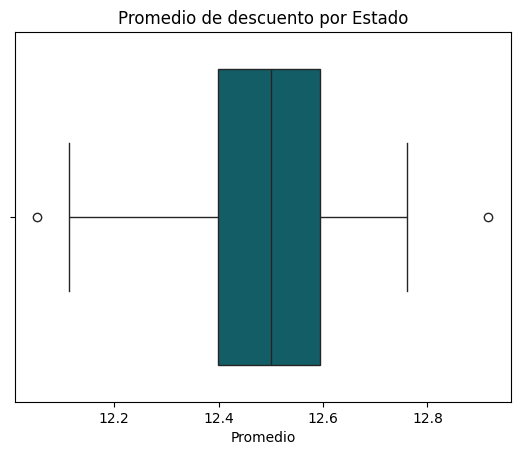

In [ ]:
sns.boxplot(x=("Descuento", "Promedio"),data=state_discount, color = "#056875")
plt.title("Promedio de descuento por Estado")
plt.xlabel("Promedio")
plt.show()

# Consulta 2: Codigos Postales 'Refunded'

In [ ]:
orders_refunded = orders[orders['status'] == "refunded"]

In [ ]:
customers_aux = customers.dropna(subset=["first_name", "postal_code"])
customers_aux = customers_aux[customers_aux.first_name != "UNDEFINED"]

In [ ]:
orders_refunded = orders_refunded.merge(customers_aux[["customer_id","first_name","postal_code"]], on="customer_id", how="inner")

In [ ]:
postal_codes_count = orders_refunded.groupby(orders_refunded["postal_code"])["order_id"].count()

In [ ]:
top_5 = postal_codes_count.sort_values(ascending=False).head(5)
top_5 = top_5.reset_index()
top_5.rename(columns={"index": "postal_code", "order_id": "frecuencia"}, inplace=True)
top_5.postal_code = top_5.postal_code.astype("int64")
top_5

,postal_code,frecuencia
0,72397,7
1,15221,7
2,14655,7
3,14025,7
4,25226,6


In [ ]:
orders_refunded_top_5 = orders_refunded.loc[orders_refunded["postal_code"].isin(top_5["postal_code"])]

In [ ]:
top_nombres = orders_refunded_top_5.groupby("first_name").agg({"order_id": "count", "postal_code": "nunique"})
top_nombres = top_nombres.sort_values("order_id", ascending=False)
top_nombres.rename(columns={"order_id": "cantidad de compras", "postal_code": "cantidad de codigos postales diferentes"}, inplace=True)
top_nombres

,cantidad de compras,cantidad de codigos postales diferentes
first_name,,
DEBBIE,5,1
JESSICA,5,1
JOHN,5,1
CATHY,4,1
SHAWN,3,1
DENNIS,2,1
HARRY,2,1
LORI,2,1
TIFFANY,2,1


# Consulta 3: Clientes Activos y Consentimiento de Marketing

In [ ]:
orders_3 = orders.merge(customers[["customer_id","customer_segment","is_active", "marketing_consent"]], on="customer_id", how="left")

In [ ]:
result = orders_3.groupby(["payment_method", "customer_segment"]).agg({"is_active": ["sum", "mean"], "marketing_consent": ["sum", "mean"]})

In [ ]:
result.rename( columns={"is_active": "Cliente activo", "marketing_consent": "Consentimiento de marketing"}, level=0, inplace=True)
result.rename( columns={"sum": "Suma", "mean": "Promedio porcentual"}, level=1, inplace=True)

In [ ]:
result[("Cliente activo", "Promedio porcentual")] = result[("Cliente activo", "Promedio porcentual")] * 100
result[("Consentimiento de marketing", "Promedio porcentual")] = result[("Consentimiento de marketing", "Promedio porcentual")] * 100
result

Cliente activo                      \
                                            Suma Promedio porcentual   
payment_method   customer_segment                                      
bank transfer    budget                   114885           89.927438   
                 premium                  116360           89.822763   
                 regular                  350102           89.934162   
                 undefined                 19415           89.614586   
cash on delivery budget                   114670           89.885086   
                 premium                  117736           90.063186   
                 regular                  350185           89.959411   
                 undefined                 19209           89.606755   
credit card      budget                   113910           89.873368   
                 premium                  116702           89.842643   
                 regular                  350004           89.971158   
                 undefined                 19490           89.592719   
debit card       budget                   113869           89.785056   
                 premium                  117625           89.794875   
                 regular                  351591           90.019049   
                 undefined                 19451           89.623554   
digital wallet   budget                   114641           89.867990   
                 premium                  117553           89.807097   
                 regular                  351015           89.874565   
                 undefined                 19328           89.809953   
paypal           budget                   114113           89.770761   
                 premium                  117467           89.906242   
                 regular                  351110           89.972146   
                 undefined                 19479           89.748433   
undefined        budget                    22611           89.758247   
                 premium                   23212           89.941104   
                 regular                   69234           90.106200   
                 undefined                  3705           89.341693   

                                  Consentimiento de marketing  \
                                                         Suma   
payment_method   customer_segment                               
bank transfer    budget                                 89153   
                 premium                                90546   
                 regular                               273106   
                 undefined                              15328   
cash on delivery budget                                 88842   
                 premium                                91760   
                 regular                               273204   
                 undefined                              15052   
credit card      budget                                 88255   
                 premium                                91178   
                 regular                               273322   
                 undefined                              15155   
debit card       budget                                 88403   
                 premium                                91479   
                 regular                               273540   
                 undefined                              15060   
digital wallet   budget                                 89114   
                 premium                                91429   
                 regular                               274082   
                 undefined                              15038   
paypal           budget                                 88744   
                 premium                                91581   
                 regular                               274019   
                 undefined                              15250   
undefined        budget                       

In [ ]:
aux = result[[("Cliente activo", "Suma")]]
aux = aux.unstack()
aux

Cliente activo                          
                           Suma                          
customer_segment         budget premium regular undefined
payment_method                                           
bank transfer            114885  116360  350102     19415
cash on delivery         114670  117736  350185     19209
credit card              113910  116702  350004     19490
debit card               113869  117625  351591     19451
digital wallet           114641  117553  351015     19328
paypal                   114113  117467  351110     19479
undefined                 22611   23212   69234      3705

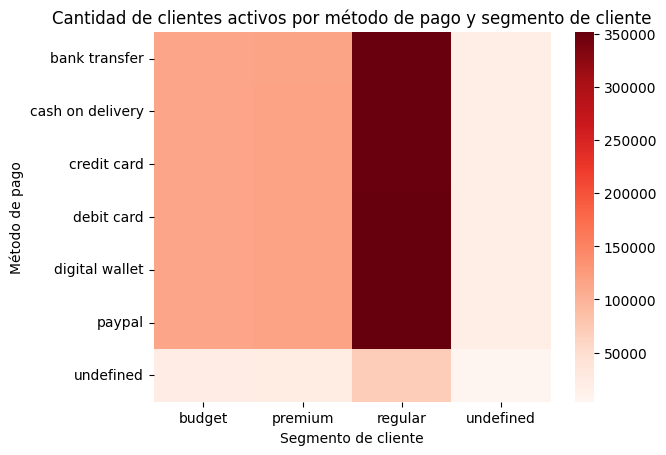

In [ ]:
aux.columns = aux.columns.get_level_values(-1)
sns.heatmap(data = aux, cmap = "Reds")
plt.title("Cantidad de clientes activos por método de pago y segmento de cliente")
plt.xlabel("Segmento de cliente")
plt.ylabel("Método de pago")
plt.show()

In [ ]:
aux2 = result[[("Consentimiento de marketing", "Suma")]]
aux2 = aux2.unstack()
aux2

Consentimiento de marketing                          
                                        Suma                          
customer_segment                      budget premium regular undefined
payment_method                                                        
bank transfer                          89153   90546  273106     15328
cash on delivery                       88842   91760  273204     15052
credit card                            88255   91178  273322     15155
debit card                             88403   91479  273540     15060
digital wallet                         89114   91429  274082     15038
paypal                                 88744   91581  274019     15250
undefined                              17538   18172   53872      2854

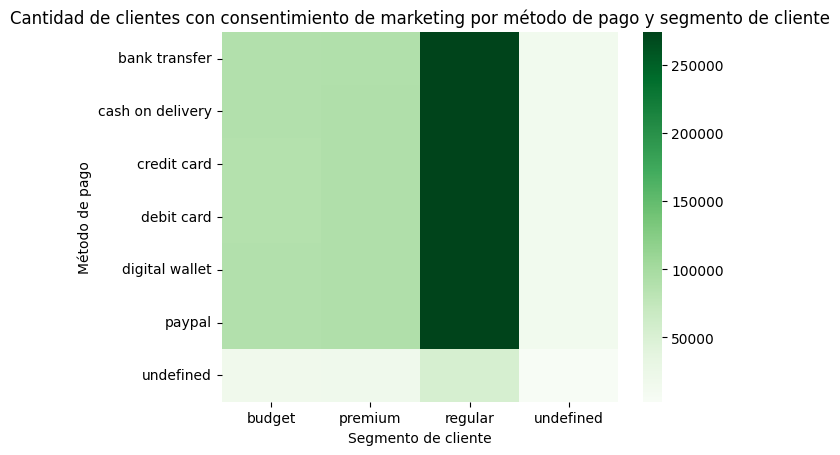

In [ ]:
aux2.columns = aux2.columns.get_level_values(-1)
sns.heatmap(data = aux2, cmap = "Greens")
plt.title("Cantidad de clientes con consentimiento de marketing por método de pago y segmento de cliente")
plt.xlabel("Segmento de cliente")
plt.ylabel("Método de pago")
plt.show()

# Consulta 4: Peso total productos "stuff"

In [ ]:
products_stuff = products[products["description"].str.contains("stuff", na=False)].copy()

In [ ]:
products_stuff.dropna(subset=["weight_kg", "stock_quantity", "brand"], inplace=True)

In [ ]:
products_stuff = products_stuff[products_stuff["brand"] != "UNDEFINED"]

In [ ]:
products_stuff['total_stock_weight'] = products_stuff['weight_kg'] * products_stuff['stock_quantity']

In [ ]:
brand_stock_weight = products_stuff.groupby("brand")['total_stock_weight'].sum()
brand_stock_weight.sort_values(ascending=False)

,total_stock_weight
brand,
3M,2250899.66
ADIDAS,1923907.88
NIKE,1783569.89
HASBRO,1714411.23
WAYFAIR,1666836.35
...,...
MARVEL,438561.98
LG,412517.91
SAMSUNG,412374.04


In [ ]:
top_5 = brand_stock_weight.sort_values(ascending=False).head(5)
top_5

,total_stock_weight
brand,
3M,2250899.66
ADIDAS,1923907.88
NIKE,1783569.89
HASBRO,1714411.23
WAYFAIR,1666836.35


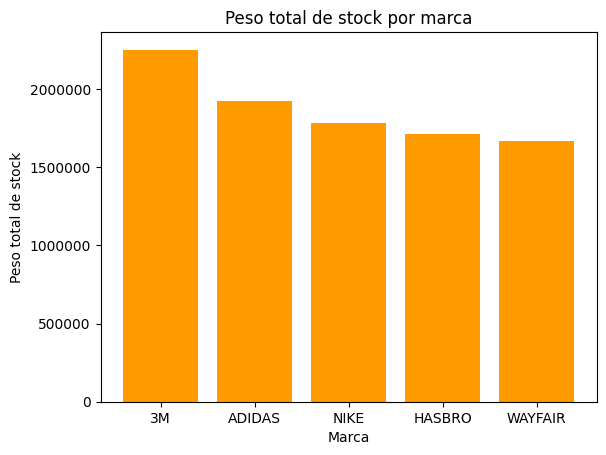

In [ ]:
plt.bar(top_5.index, top_5.values, color = '#FF9A00')
plt.title("Peso total de stock por marca")
plt.xlabel("Marca")
plt.ylabel("Peso total de stock")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
brand_stock_weight_quantity = products_stuff.groupby("brand").agg({"total_stock_weight": "sum", "product_id": "sum"})
brand_stock_weight_quantity

,total_stock_weight,product_id
brand,,
3M,2250899.66,86191587
ADIDAS,1923907.88,79639592
AMERICAN TOURISTER,785883.30,32589958
APPLE,473599.80,21471431
ASHLEY,723493.26,33850444
...,...,...
WEST ELM,846250.00,36234692
WHOLE FOODS,596726.08,29962307
WINSOR & NEWTON,803013.25,31310887


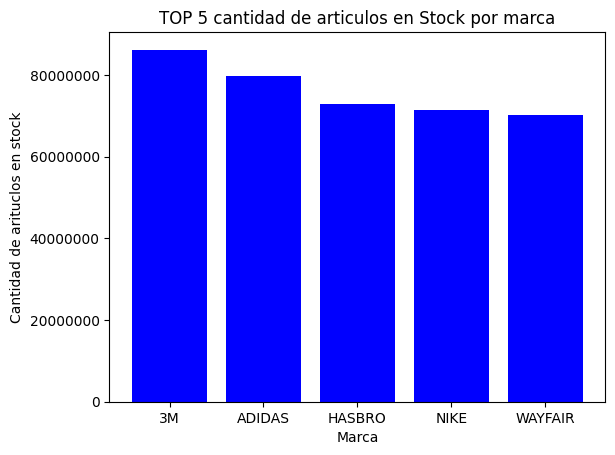

In [ ]:
top_5_cantidad_stock = brand_stock_weight_quantity.sort_values("product_id", ascending=False).head(5)
plt.bar(top_5_cantidad_stock.index, top_5_cantidad_stock.product_id, color = "blue")
plt.title("TOP 5 cantidad de articulos en Stock por marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad de arituclos en stock")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
products_stuff_2 = products[products["description"].str.contains("stuff", na=False)].copy()

In [ ]:
products_stuff_2.dropna(subset=["weight_kg", "stock_quantity", "brand"], inplace=True)

In [ ]:
products_stuff_2['total_stock_weight'] = products_stuff_2['weight_kg'] * products_stuff_2['stock_quantity']

In [ ]:
top_5_v2 = products_stuff_2.groupby("brand").agg({"total_stock_weight": "sum", "product_id": "sum"})
top_5_v2

,total_stock_weight,product_id
brand,,
3M,2250899.66,86191587
ADIDAS,1923907.88,79639592
AMERICAN TOURISTER,785883.30,32589958
APPLE,473599.80,21471431
ASHLEY,723493.26,33850444
...,...,...
WEST ELM,846250.00,36234692
WHOLE FOODS,596726.08,29962307
WINSOR & NEWTON,803013.25,31310887


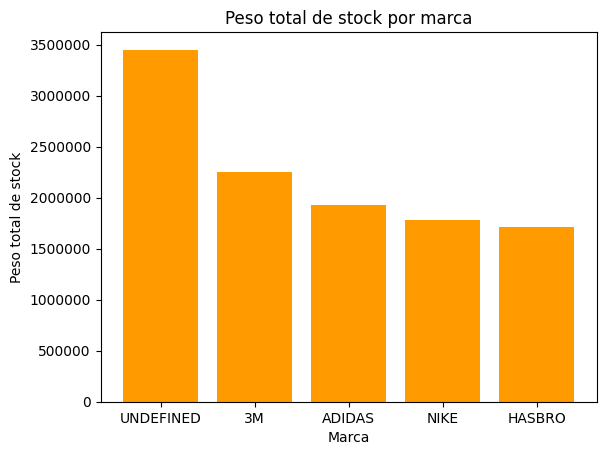

In [ ]:
top_5_cantidad_stock_2 = top_5_v2.sort_values("total_stock_weight", ascending=False).head(5)
plt.bar(top_5_cantidad_stock_2.index, top_5_cantidad_stock_2.total_stock_weight, color = '#FF9A00')
plt.title("Peso total de stock por marca")
plt.xlabel("Marca")
plt.ylabel("Peso total de stock")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

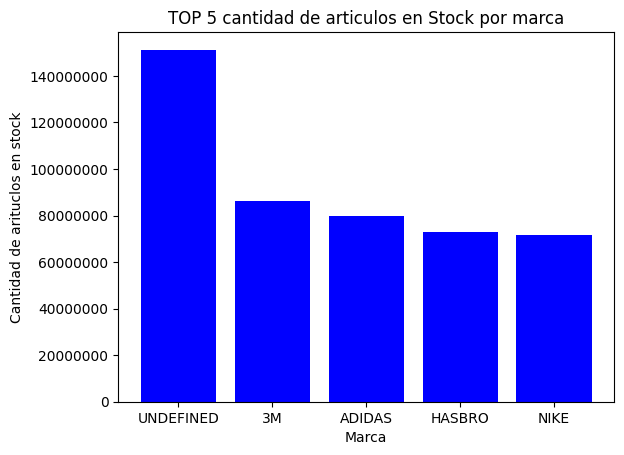

In [ ]:
top_5_cantidad_productos_2 = top_5_v2.sort_values("product_id", ascending=False).head(5)
plt.bar(top_5_cantidad_productos_2.index, top_5_cantidad_productos_2.product_id, color = "blue")
plt.title("TOP 5 cantidad de articulos en Stock por marca")
plt.xlabel("Marca")
plt.ylabel("Cantidad de arituclos en stock")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Consulta 5: Ventas 2024



In [ ]:
orders["order_date"] = pd.to_datetime(orders["order_date"], errors="coerce", format = "mixed")

In [ ]:
ventas_2024 = orders[(orders["order_date"] >= '2024-01-01') & (orders["order_date"] < '2025-01-01')]

In [ ]:
ventas_por_dia = ventas_2024.groupby(ventas_2024["order_date"].dt.date)["order_id"].count()
ventas_por_dia.head(5)

,order_id
order_date,
2024-01-01,2621
2024-01-02,2537
2024-01-03,2596
2024-01-04,2602
2024-01-05,2630


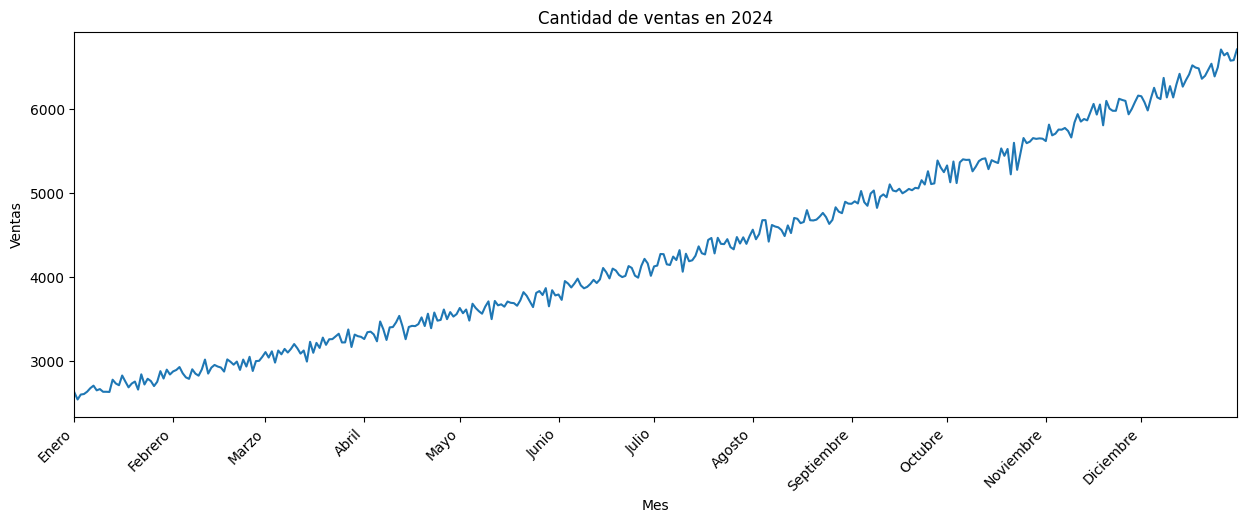

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ventas_por_dia.index, ventas_por_dia.values)

plt.title("Cantidad de ventas en 2024")
plt.xlabel("Mes")
plt.ylabel("Ventas")

meses_ticks = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

plt.xticks(ticks=meses_ticks, labels=meses, rotation=45, ha='right')

plt.xlim([pd.to_datetime('2024-01-01'), pd.to_datetime('2024-12-31')])

plt.show()

# Consulta 6: Black Friday & Cyber Monday VS Navidad

In [ ]:
orders["order_date"] = pd.to_datetime(orders["order_date"], errors="coerce", format = "mixed")

In [ ]:
black_friday_cyber_monday = orders[(orders["order_date"] >= '2024-11-29') & (orders["order_date"] <= '2024-12-02')]
ventas_rebajas = black_friday_cyber_monday.order_id.count()

In [ ]:
navidad = orders[(orders["order_date"] >= '2024-12-18') & (orders["order_date"] <= '2024-12-25')]
ventas_semana_navidad = navidad.order_id.count()

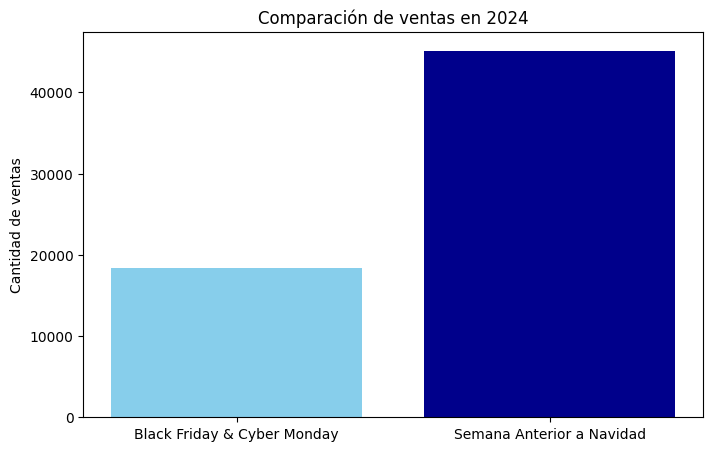

In [ ]:
eventos = ["Black Friday & Cyber Monday", "Semana Anterior a Navidad"]

ventas = [ventas_rebajas, ventas_semana_navidad]

plt.figure(figsize=(8,5))
plt.bar(eventos, ventas, color=["skyblue", "darkblue"])
plt.title("Comparación de ventas en 2024")
plt.ylabel("Cantidad de ventas")
plt.show()

# Consulta 7: Precio VS Descuento

In [ ]:
order_items_2 = order_items.dropna(subset = ["unit_price", "discount_amount"])

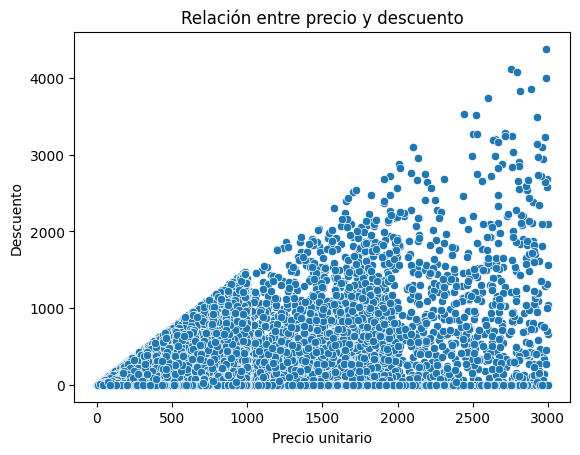

In [ ]:
sns.scatterplot(x=order_items_2.unit_price, y=order_items_2.discount_amount, data=order_items_2)
plt.title("Relación entre precio y descuento")
plt.xlabel("Precio unitario")
plt.ylabel("Descuento")
plt.show()

In [ ]:
desvio = order_items_2.discount_amount.std()
order_items_2[order_items_2.discount_amount > order_items_2.unit_price]

,Unnamed: 0,order_item_id,order_id,product_id,quantity,unit_price,line_total,discount_amount
45,45,46,19900417,985159,9.0,43.28,389.52,54.74
81,81,82,19900431,977258,10.0,53.75,NaN,64.93
125,125,126,19900447,950689,NaN,907.74,9077.40,1026.05
206,206,207,19900470,991115,NaN,612.99,5516.91,733.38
347,347,348,19900522,912768,9.0,160.46,1444.14,203.79
...,...,...,...,...,...,...,...,...
285002,285002,285003,19999919,971293,10.0,4.78,47.80,5.94
285050,285050,285051,19999935,962820,10.0,871.76,NaN,1217.25
285139,285139,285140,19999964,976591,10.0,580.43,5804.30,640.66
285195,285195,285196,19999986,944415,9.0,317.11,NaN,376.70


# Consulta 8: Robo de productos 1er cuatrimestre 2024 VS 2025


In [ ]:
robos = inventory_logs[(inventory_logs.reason == "theft") & (inventory_logs.quantity_change < 0) & (inventory_logs.movement_type == "out")]

In [ ]:
robos.dropna(subset = ["timestamp"])
robos = robos[robos.timestamp != "undefined"]

In [ ]:
robos['timestamp'] = pd.to_datetime(robos['timestamp'], format='mixed')

In [ ]:
robos_2025 = robos[(robos.timestamp >= "2025-01-01") &( robos.timestamp < "2025-05-01")]

In [ ]:
robos_2024 = robos[(robos.timestamp >= "2024-01-01") &( robos.timestamp < "2024-05-01")]

In [ ]:
cantidad_de_robos_2024 = robos_2024.groupby(robos_2024.timestamp.dt.month)["reason"].count()
cantidad_de_robos_2024

,reason
timestamp,
1,493
2,487
3,484
4,523


In [ ]:
cantidad_de_robos_2025 = robos_2025.groupby(robos_2025.timestamp.dt.month)["reason"].count()
cantidad_de_robos_2025

,reason
timestamp,
1,523
2,436
3,516
4,533


In [ ]:
robos_grafico = pd.DataFrame({"2024": cantidad_de_robos_2024, "2025": cantidad_de_robos_2025})
robos_grafico.reset_index(inplace=True)
robos_grafico.rename(columns={"timestamp": "Mes"}, inplace=True)
robos_grafico

,Mes,2024,2025
0,1,493,523
1,2,487,436
2,3,484,516
3,4,523,533


In [ ]:
robos_largo = robos_grafico.melt(id_vars="Mes", value_vars=["2024", "2025"], var_name="Año", value_name="Cantidad")
robos_largo

,Mes,Año,Cantidad
0,1,2024,493
1,2,2024,487
2,3,2024,484
3,4,2024,523
4,1,2025,523
5,2,2025,436
6,3,2025,516
7,4,2025,533


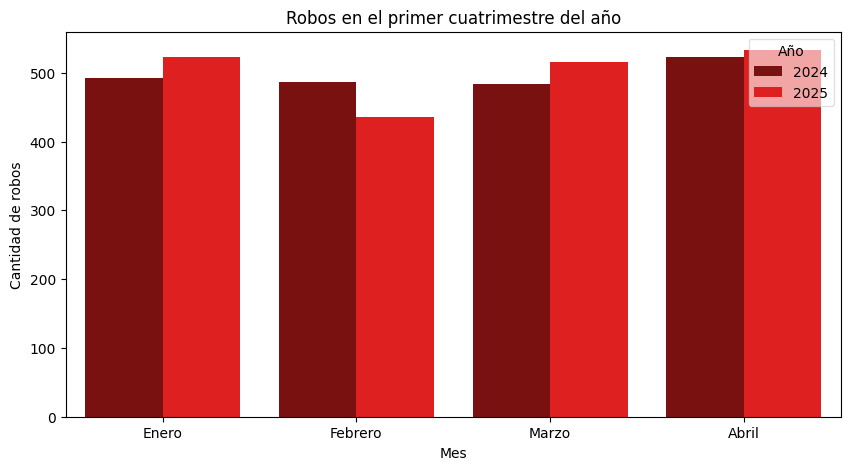

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=robos_largo, x="Mes", y="Cantidad", hue="Año", palette={"2024": "darkred", "2025": "red"})
plt.title("Robos en el primer cuatrimestre del año")
plt.ylabel("Cantidad de robos")

meses = ["Enero", "Febrero", "Marzo", "Abril"]
plt.xticks(ticks=range(4), labels=meses)
plt.legend(title="Año", framealpha=0.6)
plt.show()

# Consulta 9: Rating por categoria

In [ ]:
products_parent_categories = products.merge(categories[["category_id", "parent_category"]], on="category_id", how="left")

In [ ]:
products_parent_categories = products_parent_categories.merge(reviews[["product_id", "rating"]], on="product_id", how="left")

In [ ]:
products_parent_categories = products_parent_categories.dropna(subset=["rating"])

In [ ]:
rating_categoria = products_parent_categories.pivot_table(index="parent_category", columns="rating", aggfunc="size")
rating_categoria.head(5)

rating,1.0,2.0,3.0,4.0,5.0
parent_category,,,,,
ART & CRAFTS,159,310,745,1965,1648
AUTOMOTIVE,143,339,708,1851,1575
BABY & KIDS,136,323,717,1885,1560
BOOKS,143,343,714,2003,1784
CLOTHING,97,263,582,1589,1365


In [ ]:
rating_categoria["promedio"] = products_parent_categories.groupby("parent_category").agg({"rating": "mean"})
rating_categoria.head(5)

rating,1.0,2.0,3.0,4.0,5.0,promedio
parent_category,,,,,,
ART & CRAFTS,159,310,745,1965,1648,3.959809
AUTOMOTIVE,143,339,708,1851,1575,3.948007
BABY & KIDS,136,323,717,1885,1560,3.954339
BOOKS,143,343,714,2003,1784,3.990977
CLOTHING,97,263,582,1589,1365,3.991273


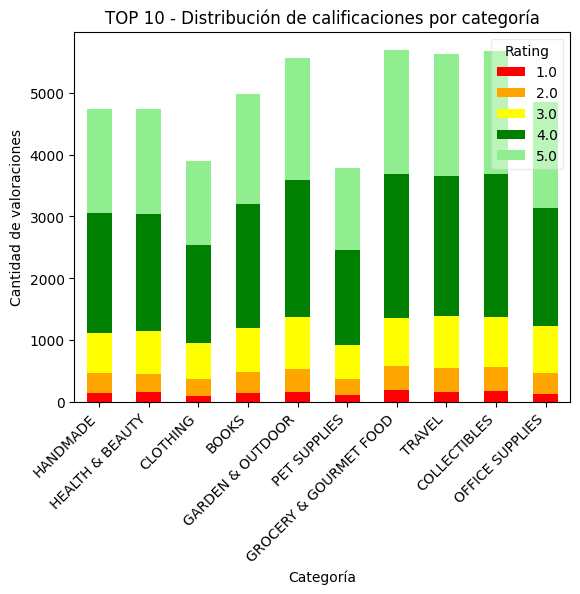

In [ ]:
rating_categoria_top_5 = rating_categoria.sort_values("promedio", ascending=False).head(10)
rating_categoria_top_5 = rating_categoria_top_5.drop(columns=["promedio"])
rating_categoria_top_5.plot(kind='bar', stacked=True, color = ["red", "orange", "yellow", "green", "#90EE90"])

plt.xlabel("Categoría")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cantidad de valoraciones")
plt.title("TOP 10 - Distribución de calificaciones por categoría")
plt.legend(title="Rating", framealpha=0.4)
plt.show()

In [ ]:
rating_categoria_top_10_cantidad = products_parent_categories.groupby("parent_category").agg({"rating": "count"})
rating_categoria_top_10_cantidad = rating_categoria_top_10_cantidad[rating_categoria_top_10_cantidad.index.isin(rating_categoria_top_5.index)]
rating_categoria_top_10_cantidad.rename(columns={"rating": "Cant calificaciones"}, inplace = True)
rating_categoria_top_10_cantidad.sort_values("Cant calificaciones", ascending=False)

,Cant calificaciones
parent_category,
GROCERY & GOURMET FOOD,5704
COLLECTIBLES,5686
TRAVEL,5629
GARDEN & OUTDOOR,5575
BOOKS,4987
OFFICE SUPPLIES,4856
HEALTH & BEAUTY,4744
HANDMADE,4740
CLOTHING,3896
